In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

[[ 91  89  86 ... 126 125 127]
 [ 90  89  87 ... 129 128 132]
 [ 92  92  91 ... 133 132 130]
 ...
 [ 62  62  60 ...  92  92  98]
 [ 56  55  54 ...  90 105 106]
 [ 58  57  56 ... 104 106 108]]


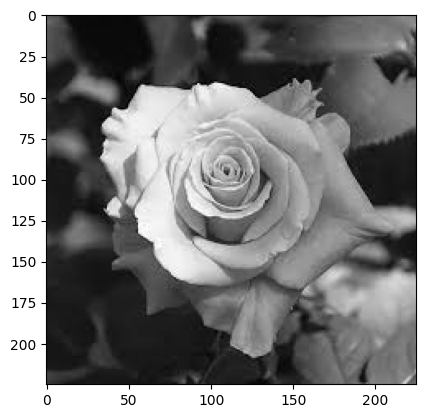

In [2]:
path = 'UTS_FILE/1-Rose.jpg'

f = cv2.imread(path, 0)

plt.imshow(f, cmap= 'gray')

print(f)

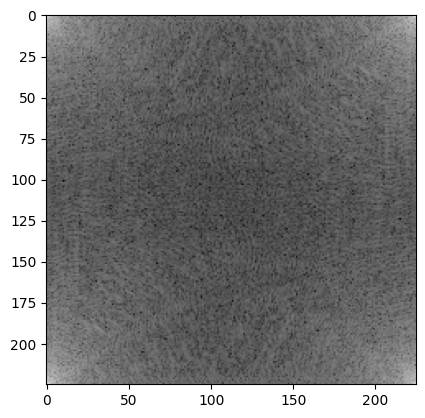

In [3]:
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')

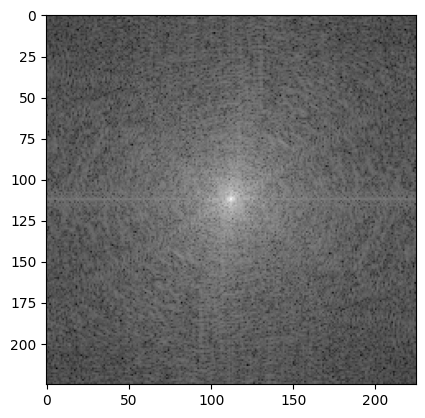

In [4]:
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')

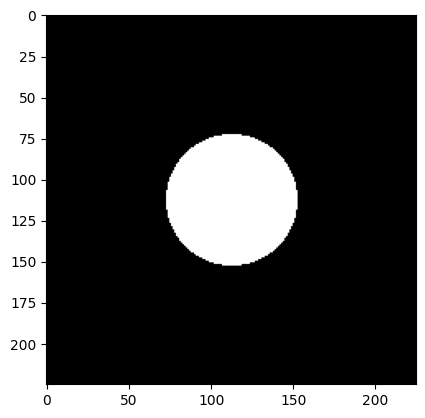

In [5]:
M, N = f.shape

H = np.zeros((M,N), dtype=np.float32)
D0 = 40

for i in range(M):
    for j in range(N):
        D = np.sqrt((i - M/2)**2 + (j - N/2)**2)
        if D <= D0:
            H[i,j] = 1
        else:
            H[i,j] = 0

plt.imshow(H, cmap='gray')


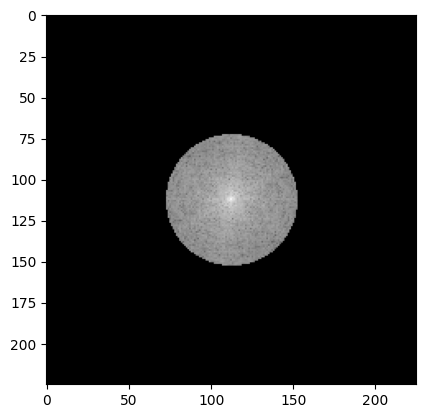

In [6]:
filtered = Fshift * H

plt.imshow(np.log1p(np.abs(filtered)), cmap='gray')

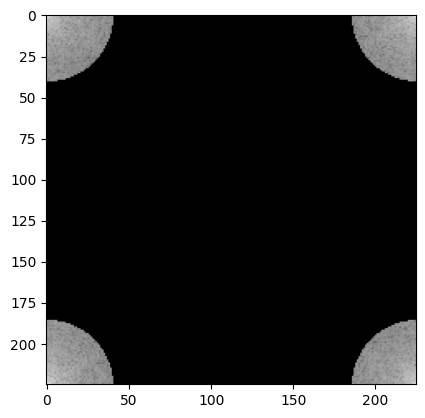

In [7]:
Fshiftback = np.fft.ifftshift(filtered)

plt.imshow(np.log1p(np.abs(Fshiftback)), cmap='gray')

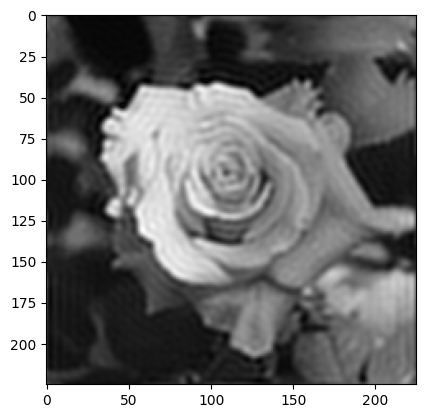

In [8]:
fback = np.abs(np.fft.ifft2(Fshiftback))
plt.imshow(fback, cmap='gray')

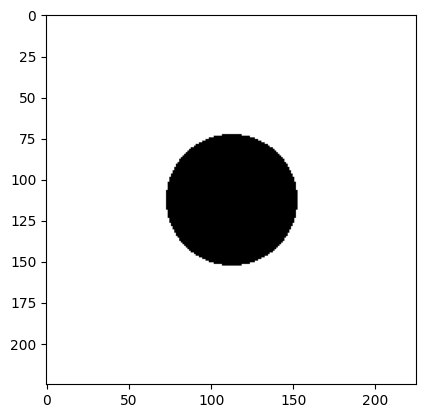

In [9]:
highpass = 1- H

plt.imshow(highpass, cmap='gray')

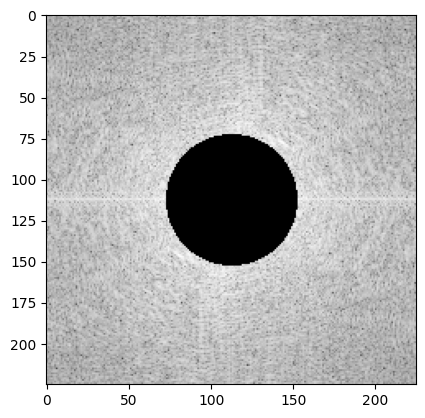

In [10]:
filterup = highpass * Fshift

plt.imshow(np.log1p(np.abs(filterup)), cmap='gray')

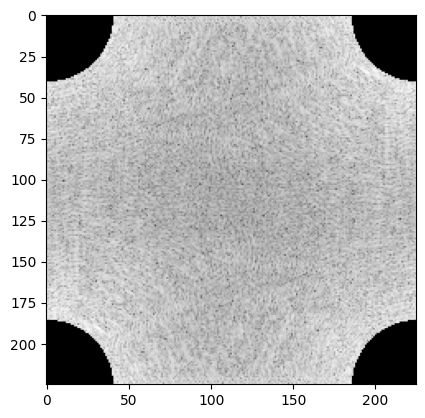

In [11]:
filterupshiftback = np.fft.ifftshift(filterup)

plt.imshow(np.log1p(np.abs(filterupshiftback)), cmap='gray')

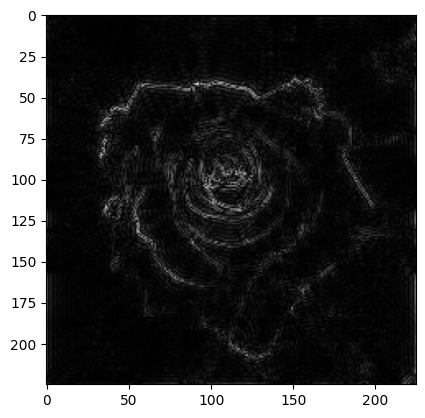

In [12]:
filterupback = np.abs(np.fft.ifft2(filterupshiftback))

plt.imshow(filterupback, cmap='gray')

(-0.5, 224.5, 224.5, -0.5)

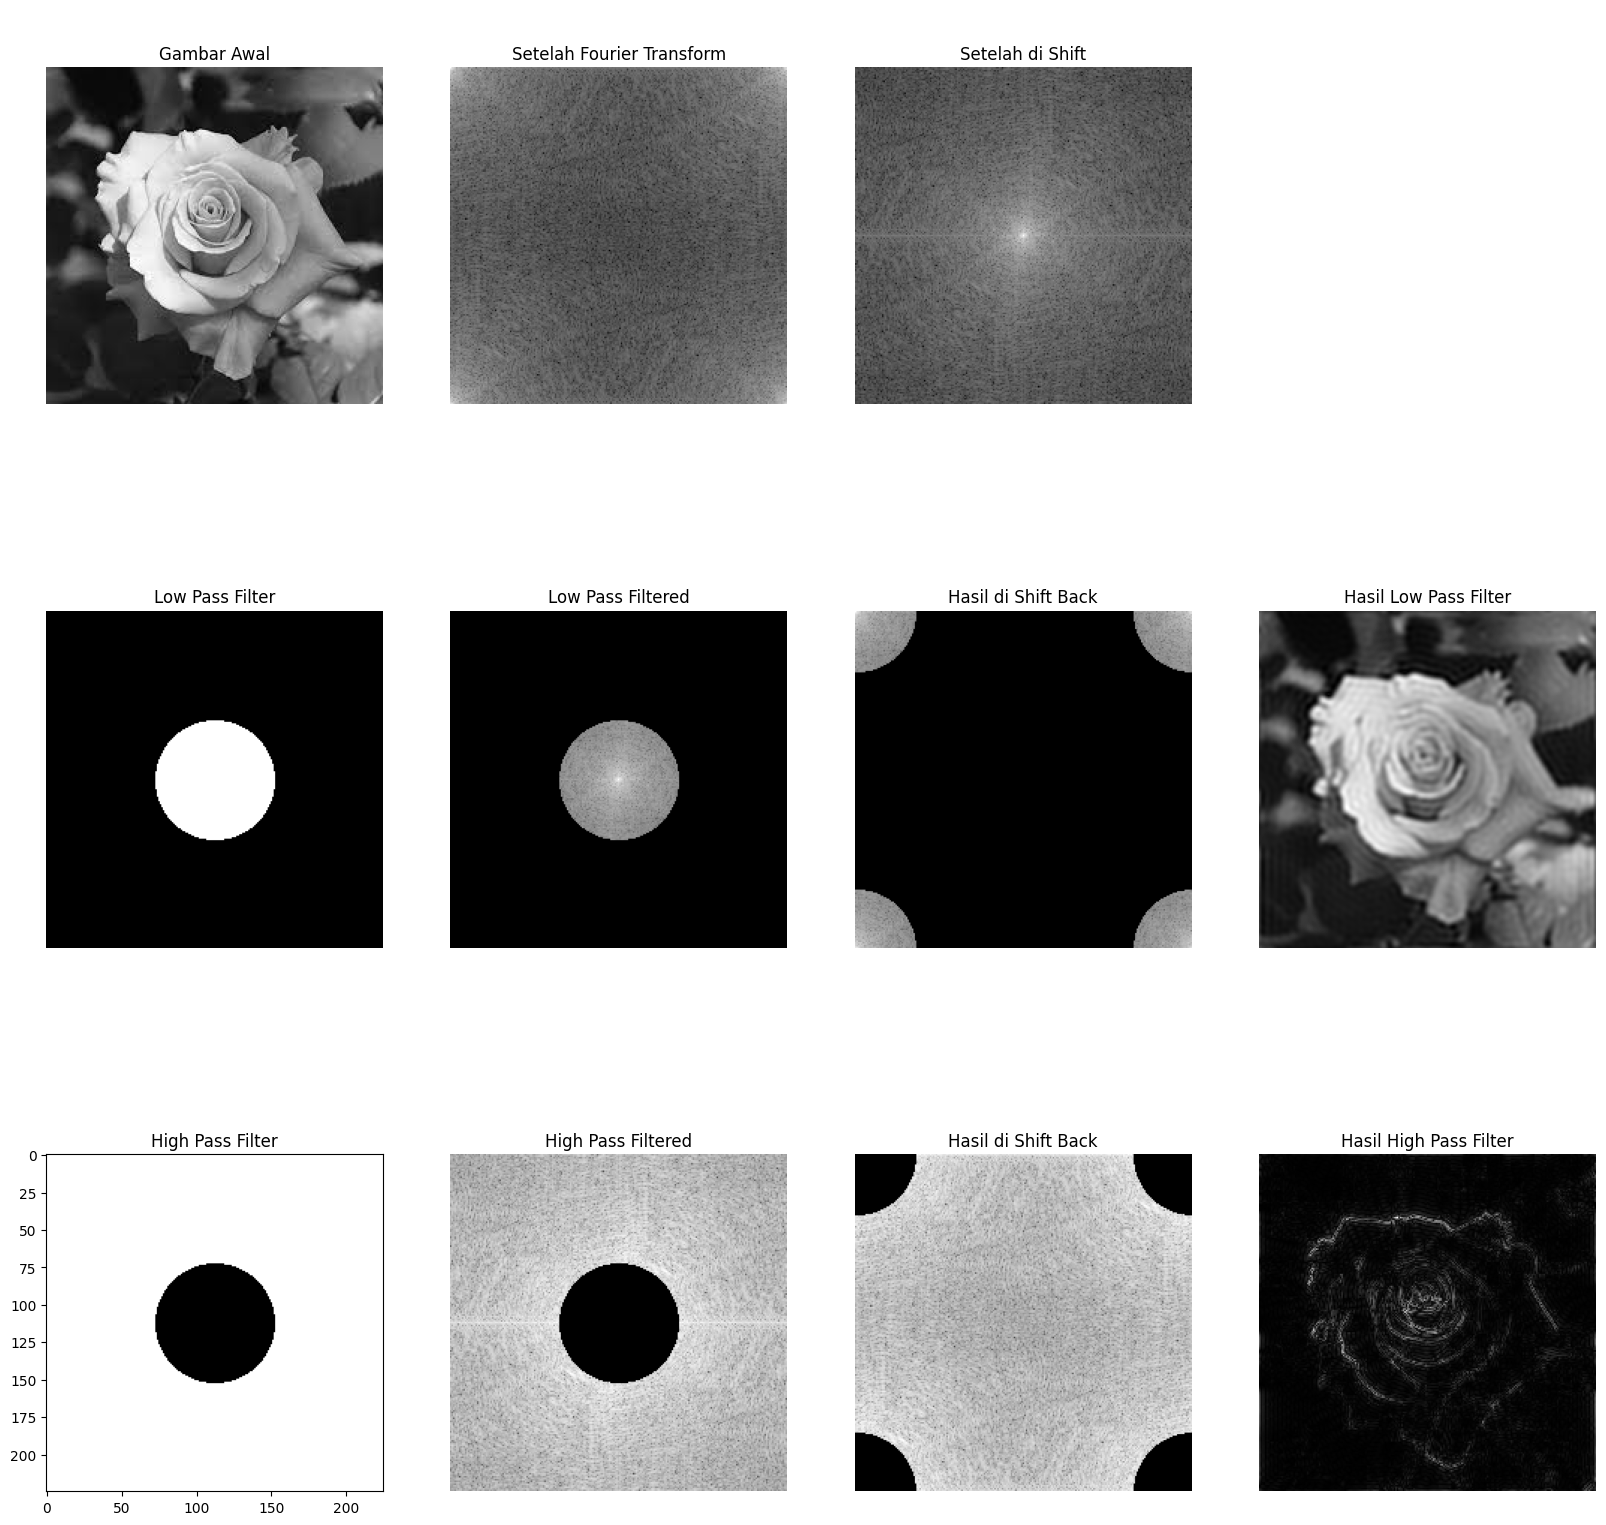

In [13]:
# plt.axis('off')

# plt.subplot(3,5,1), plt.imshow(f, cmap='gray')
# plt.subplot(3,5,3), plt.imshow(np.log1p(np.abs(F)), cmap='gray')
# plt.subplot(3,5,5), plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')



fig, axis = plt.subplots(3, 4 , figsize=(20,20))

axis[0,0].imshow(f, cmap='gray')
axis[0,0].set_title('Gambar Awal')
axis[0, 0].axis("off")



axis[0,1].imshow(np.log1p(np.abs(F)), cmap='gray')
axis[0,1].set_title('Setelah Fourier Transform')
axis[0,1].axis('off')

axis[0,2].imshow(np.log1p(np.abs(Fshift)), cmap='gray')
axis[0,2].set_title('Setelah di Shift')
axis[0,2].axis('off')

axis[0,3].axis('off')


axis[1,0].imshow(H, cmap='gray')
axis[1,0].set_title('Low Pass Filter')
axis[1,0].axis('off')



axis[1,1].imshow(np.log1p(np.abs(filtered)), cmap='gray')
axis[1,1].set_title('Low Pass Filtered')
axis[1,1].axis('off')


axis[1,2].imshow(np.log1p(np.abs(Fshiftback)), cmap='gray')
axis[1,2].set_title('Hasil di Shift Back')
axis[1,2].axis('off')


axis[1,3].imshow(fback, cmap='gray')
axis[1,3].set_title('Hasil Low Pass Filter')
axis[1,3].axis('off')


axis[2,0].imshow(highpass, cmap='gray')
axis[2,0].set_title('High Pass Filter')
# axis[2,0].axis('off')

axis[2,1].imshow(np.log1p(np.abs(filterup)), cmap='gray')
axis[2,1].set_title('High Pass Filtered')
axis[2,1].axis('off')

axis[2,2].imshow(np.log1p(np.abs(filterupshiftback)), cmap='gray')
axis[2,2].set_title('Hasil di Shift Back')
axis[2,2].axis('off')

axis[2,3].imshow(filterupback, cmap='gray')
axis[2,3].set_title('Hasil High Pass Filter')
axis[2,3].axis('off')
